# LX Mixer: Example Usage

In [1]:
import matplotlib.pyplot as plt
import time
import sys
sys.path.append('..')
from Mixer import LXMixer
from utils import pauli_int_to_str
from plotting.plot_mixers import Plotter

In [2]:
%config InlineBackend.figure_format = "retina" # Make sure plots are high resolution.

In [3]:
# Example from the article.
nL = 4
B = [0b1110, 0b1100, 0b1001, 0b0100, 0b0011] # nL = 4, nB = 5, example from the article

# Other examples.

# nL = 3
# B = [6,5] # nB = 2
# B = [6, 2, 1, 0, 5] # nB = 5
# B = [6, 3, 1, 5, 0, 4, 2] # nB = 7
# B = [0, 1, 2, 3, 4, 5, 6, 7] # bB = 8, whole space, 8-orbit

# nL = 4
# B = [0b0000, 0b1111, 0b0001, 0b1101, 0b1110, 0b1100] # nB = 6
# B = [0b0000, 0b1111, 0b0001, 0b1101, 0b1110, 0b1100, 0b0010] # nB = 7
# B = [0b0000, 0b1111, 0b0001, 0b1101, 0b1110, 0b1100, 0b0010, 0b0011] # nB = 8, 8-orbit
# B = [0b1110, 0b1100, 0b1001, 0b0100, 0b0011, 0b0000, 0b1111, 0b1011, 
#      0b1101, 0b0110, 0b0010, 0b0101, 0b1000, 0b0001, 0b0111] # nB = 15

# nL = 5
# B = [0b10011, 0b01100, 0b11000, 0b00011,
#     0b01001, 0b10100, 0b00110, 0b01110] # nB = 8
# B = [0b00001, 0b00010, 0b00100,
#     0b01000, 0b10000, 0b00011,
#     0b00101, 0b00110, 0b01001,
#     0b01010, 0b01100, 0b10001, 
#     0b10010, 0b10100, 0b11000] # nB = 15

print(f"\nB = [{" ,".join(f"|{b:0{len(bin(max(B)))-2}b}>" for b in B)}]") # Print B in binary format.


B = [|1110> ,|1100> ,|1001> ,|0100> ,|0011>]


Using the `"largest_orbits"` heuristic.

In [4]:
lxmixer = LXMixer(B, nL, method="largest_orbits")

In [5]:
print("\nComputing family of valid graphs...")
start_time = time.time()
lxmixer.compute_family_of_valid_graphs()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nFamily of valid graphs:")
for k, v in lxmixer.family_of_valid_graphs.items():
    print(f"{pauli_int_to_str(k, lxmixer.nL)} : {v}")


Computing family of valid graphs...

Time: 0.0001 s
______________

Family of valid graphs:
IIXI : [(0, 1)]
IXXX : [(0, 2), (3, 4)]
XIXI : [(0, 3), (2, 4)]
XXIX : [(0, 4), (2, 3)]
IXIX : [(1, 2)]
XIII : [(1, 3)]
XXXX : [(1, 4)]


In [6]:
print("\nComputing all orbits...")
start_time = time.time()
lxmixer.compute_all_orbits()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nOrbits (without projectors and costs):")
for nodes, orbit in lxmixer.orbits.items():
    print(f"{nodes} : [{', '.join(f'{pauli_int_to_str(X, lxmixer.nL)}' for X in orbit.Xs)}]")


Computing all orbits...

Time: 0.0004 s
______________

Orbits (without projectors and costs):
(0, 2, 3, 4) : [XXIX, XIXI]
(0, 1) : [IIXI]
(1, 4) : [XXXX]
(1, 3) : [XIII]
(1, 2) : [IXIX]


In [7]:
print("\nComputing minimal generating sets...")
start_time = time.time()
lxmixer.compute_minimal_generating_sets()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nComputing projectors...")
start_time = time.time()
lxmixer.compute_projector_stabilizers()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nComputing costs...")
start_time = time.time()
lxmixer.compute_costs()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nOrbits with projectors and costs:")
for nodes, orbit in lxmixer.orbits.items():
    print(f"{nodes} : [{', '.join(f'{pauli_int_to_str(X, lxmixer.nL)}' for X in orbit.Xs)}], [{', '.join(f'{"+" if Z[0] == 1 else "-"}{pauli_int_to_str(Z[1], lxmixer.nL, "Z")}' for Z in orbit.Zs if len(Z) == 2)}], {orbit.cost}")


Computing minimal generating sets...

Time: 0.0001 s
______________

Computing projectors...

Time: 0.0006 s
______________

Computing costs...

Time: 0.0001 s
______________

Orbits with projectors and costs:
(0, 2, 3, 4) : [XIXI, XXIX], [+IIII, +ZIZZ, -ZZZI, -IZIZ], 36
(0, 1) : [IIXI], [+IIII, +IIIZ, -IZII, -IZIZ, -ZIII, -ZIIZ, +ZZII, +ZZIZ], 24
(1, 4) : [XXXX], [+IIII, -ZIIZ, -ZIZI, +IIZZ, +ZZII, -IZIZ, -IZZI, +ZZZZ], 48
(1, 3) : [XIII], [+IIII, +IIIZ, +IIZI, +IIZZ, -IZII, -IZIZ, -IZZI, -IZZZ], 24
(1, 2) : [IXIX], [+IIII, -IZIZ, +IIZI, -IZZZ, -ZIII, +ZZIZ, -ZIZI, +ZZZZ], 32


In [8]:
print("\nFinding best mixer...")
start_time = time.time()
lxmixer.find_best_mixer()
best_combinations, best_Xs, best_Zs, best_cost = lxmixer.best_combinations, lxmixer.best_Xs, lxmixer.best_Zs, lxmixer.best_cost
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print(f"\nFound {len(best_Xs)} best combinations of orbits with cost {best_cost}.")
print("\nBest mixer:")
print(f"[{', '.join(f'[{", ".join(f"[{", ".join(f"{pauli_int_to_str(x, lxmixer.nL)}" for x in sub_Xs)}]" for sub_Xs in Xs)}]' for Xs in best_Xs)}]")
print("\nBest projectors:")
print(f"[{', '.join(f'[{", ".join(f"[{", ".join(f'{"+" if z[0] > 0 else "-"}{pauli_int_to_str(z[1], lxmixer.nL, "Z")}' for z in sub_Zs)}]" for sub_Zs in Zs)}]' for Zs in best_Zs)}]")


Finding best mixer...


Combo size 2/4: 10it [00:00, 52891.60it/s]
Combo size 3/4: 10it [00:00, 53294.84it/s]
Combo size 4/4: 5it [00:00, 29330.80it/s]


Time: 0.0180 s
______________

Found 2 best combinations of orbits with cost 60.

Best mixer:
[[[XIXI, XXIX], [IIXI]], [[XIXI, XXIX], [XIII]]]

Best projectors:
[[[+IIII, +ZIZZ, -ZZZI, -IZIZ], [+IIII, +IIIZ, -IZII, -IZIZ, -ZIII, -ZIIZ, +ZZII, +ZZIZ]], [[+IIII, +ZIZZ, -ZZZI, -IZIZ], [+IIII, +IIIZ, +IIZI, +IIZZ, -IZII, -IZIZ, -IZZI, -IZZZ]]]


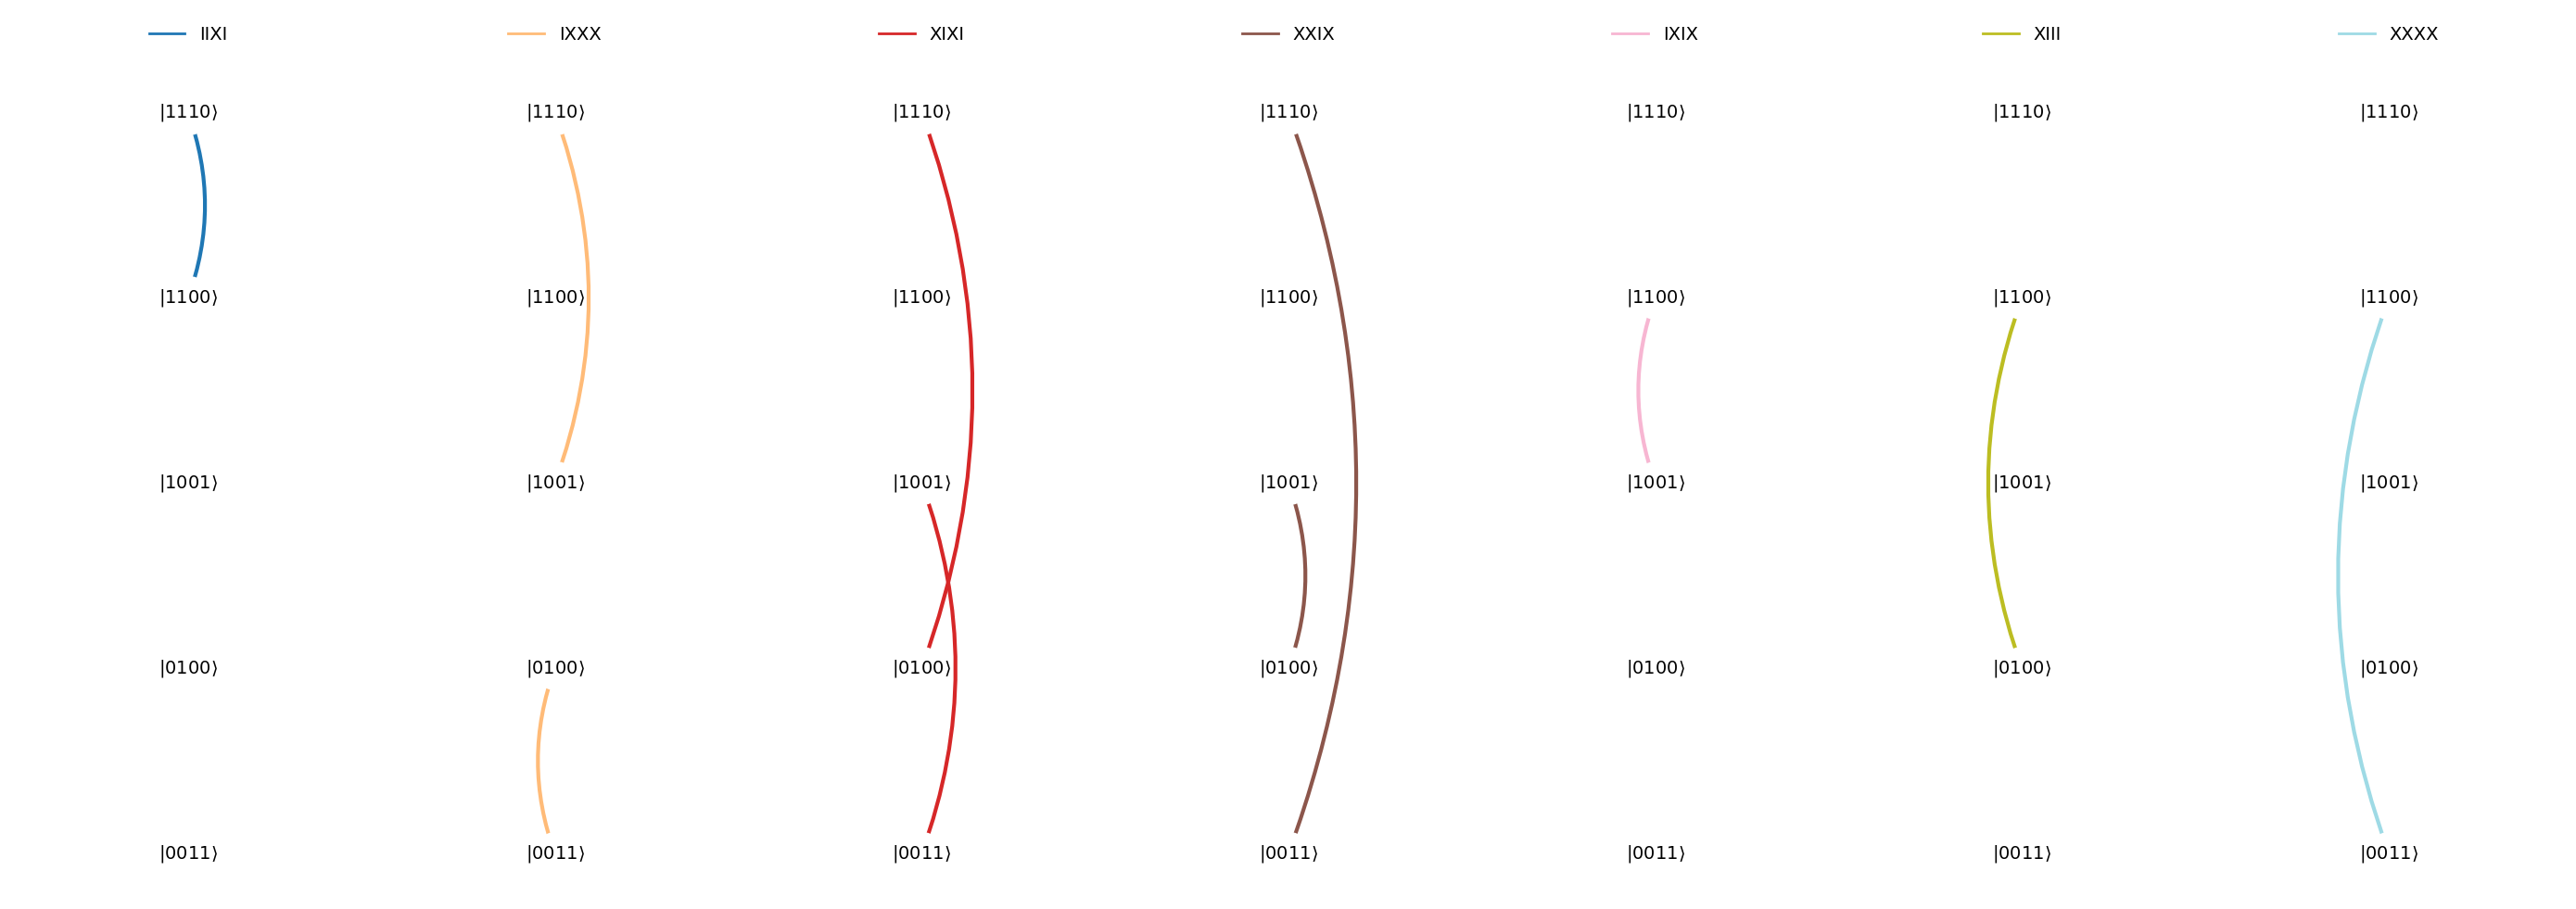

In [9]:
# Draw family of valid graphs
plotter = Plotter(lxmixer) # Initialize the Plotter object with the LXMixer object.
plotter.draw_family_of_valid_graphs(lw=1.5, r=0.2, group_size=1)
plt.show()

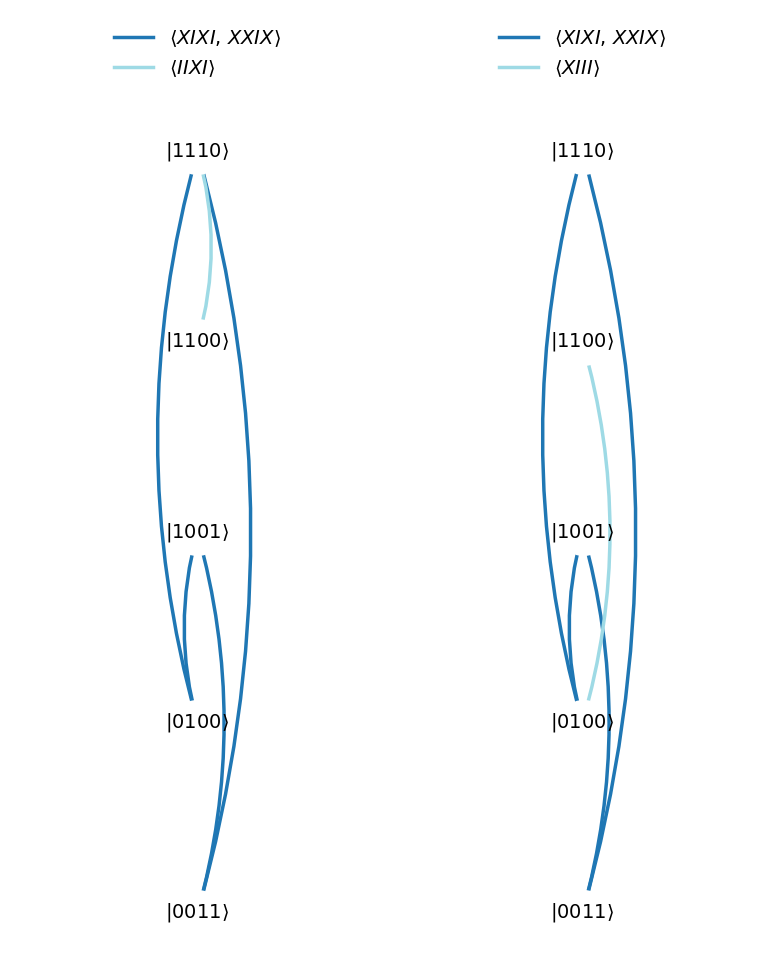

In [10]:
# Draw best mixer(s).
plotter.draw_best_graphs(r=0.15, lw=1.25)
plt.show()

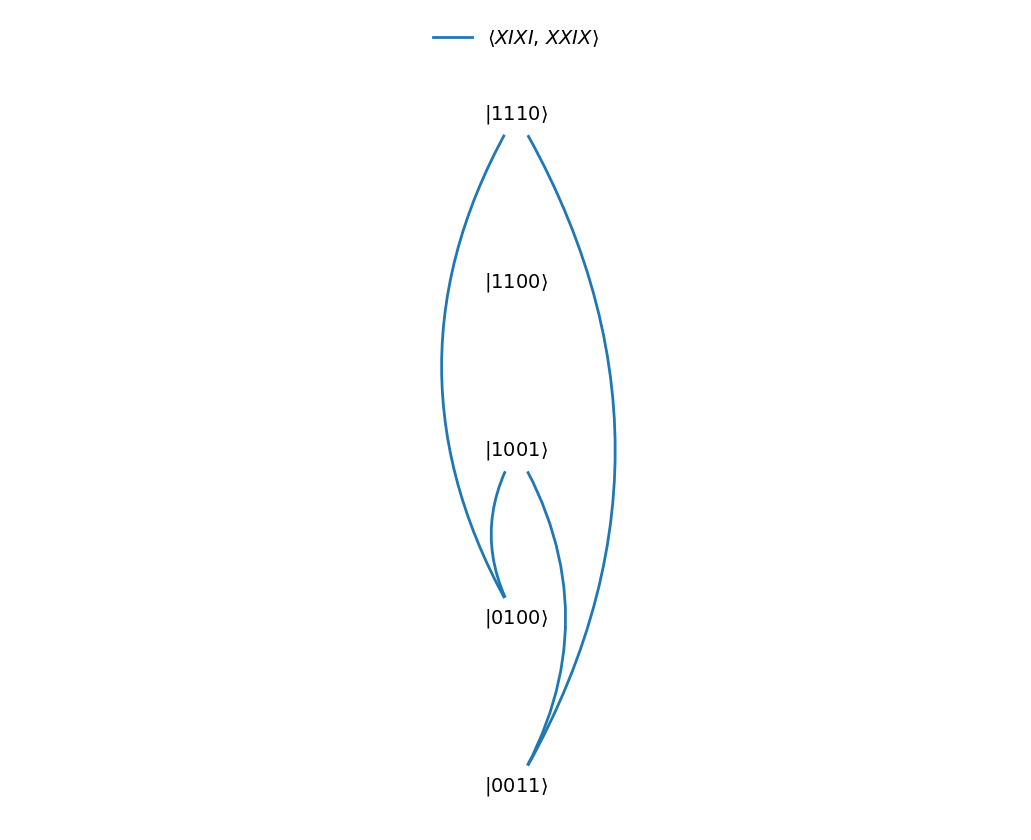

In [11]:
# Draw any orbit.
fig, ax = plt.subplots()
plotter.draw_mixer_graph(ax, [list(lxmixer.orbits.keys())[0]], [list(lxmixer.orbits.values())[0].Xs], r=0.1)
plt.show()

# If wanting to save plots, use the `saveas` parameter in the drawing functions.

Using the `"all_suborbits"` method.

In [12]:
lxmixer = LXMixer(B, nL, method="all_suborbits")
lxmixer.compute_family_of_valid_graphs()

In [13]:
print("\nComputing all orbits...")
start_time = time.time()
lxmixer.compute_all_orbits()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nOrbits (without projectors and costs):")
for nodes, orbit in lxmixer.orbits.items():
    print(f"{nodes} : [{', '.join(f'{pauli_int_to_str(X, lxmixer.nL)}' for X in orbit.Xs)}]")


Computing all orbits...

Time: 0.0019 s
______________

Orbits (without projectors and costs):
(0, 4) : [XXIX]
(0, 2, 3, 4) : [IXXX, XIXI]
(0, 3) : [XIXI]
(0, 2) : [IXXX]
(0, 1) : [IIXI]
(1, 4) : [XXXX]
(1, 3) : [XIII]
(1, 2) : [IXIX]
(2, 3) : [XXIX]
(2, 4) : [XIXI]
(3, 4) : [IXXX]


In [15]:
print("\nComputing minimal generating sets...")
start_time = time.time()
lxmixer.compute_minimal_generating_sets()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nComputing projectors...")
start_time = time.time()
lxmixer.compute_projector_stabilizers()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nComputing costs...")
start_time = time.time()
lxmixer.compute_costs()
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print("\nOrbits with projectors and costs:")
for nodes, orbit in lxmixer.orbits.items():
    print(f"{nodes} : [{', '.join(f'{pauli_int_to_str(X, lxmixer.nL)}' for X in orbit.Xs)}], [{', '.join(f'{"+" if Z[0] == 1 else "-"}{pauli_int_to_str(Z[1], lxmixer.nL, "Z")}' for Z in orbit.Zs if len(Z) == 2)}], {orbit.cost}")


Computing minimal generating sets...

Time: 0.0004 s
______________

Computing projectors...

Time: 0.0042 s
______________

Computing costs...

Time: 0.0004 s
______________

Orbits with projectors and costs:
(0, 4) : [XXIX], [+IIII, -ZIIZ, +ZZII, -IZIZ, -IIZI, +ZIZZ, -ZZZI, +IZZZ], 40
(0, 2, 3, 4) : [XIXI, IXXX], [+IIII, -ZZZI, -IZIZ, +ZIZZ], 36
(0, 3) : [XIXI], [+IIII, +ZIZI, +IIIZ, +ZIZZ, -IZII, -ZZZI, -IZIZ, -ZZZZ], 32
(0, 2) : [IXXX], [+IIII, -IZIZ, +IZZI, -IIZZ, -ZIII, +ZZIZ, -ZZZI, +ZIZZ], 40
(0, 1) : [IIXI], [+IIII, +IIIZ, -IZII, -IZIZ, -ZIII, -ZIIZ, +ZZII, +ZZIZ], 24
(1, 4) : [XXXX], [+IIII, -ZIIZ, -ZIZI, +IIZZ, +ZZII, -IZIZ, -IZZI, +ZZZZ], 48
(1, 3) : [XIII], [+IIII, +IIIZ, +IIZI, +IIZZ, -IZII, -IZIZ, -IZZI, -IZZZ], 24
(1, 2) : [IXIX], [+IIII, -IZIZ, +IIZI, -IZZZ, -ZIII, +ZZIZ, -ZIZI, +ZZZZ], 32
(2, 3) : [XXIX], [+IIII, +ZIIZ, -ZZII, -IZIZ, +IIZI, +ZIZZ, -ZZZI, -IZZZ], 40
(2, 4) : [XIXI], [+IIII, -ZIZI, -IIIZ, +ZIZZ, +IZII, -ZZZI, -IZIZ, +ZZZZ], 32
(3, 4) : [IXXX], [+IIII, 

In [16]:
print("\nFinding best mixer...")
start_time = time.time()
lxmixer.find_best_mixer()
best_combinations, best_Xs, best_Zs, best_cost = lxmixer.best_combinations, lxmixer.best_Xs, lxmixer.best_Zs, lxmixer.best_cost
end_time = time.time()
print(f"\nTime: {end_time - start_time:.4f} s")
print("______________")

print(f"\nFound {len(best_Xs)} best combinations of orbits with cost {best_cost}.")
print("\nBest mixer:")
print(f"[{', '.join(f'[{", ".join(f"[{", ".join(f"{pauli_int_to_str(x, lxmixer.nL)}" for x in sub_Xs)}]" for sub_Xs in Xs)}]' for Xs in best_Xs)}]")
print("\nBest projectors:")
print(f"[{', '.join(f'[{", ".join(f"[{", ".join(f'{"+" if z[0] > 0 else "-"}{pauli_int_to_str(z[1], lxmixer.nL, "Z")}' for z in sub_Zs)}]" for sub_Zs in Zs)}]' for Zs in best_Zs)}]")


Finding best mixer...


Combo size 2/4: 55it [00:00, 183375.77it/s]
Combo size 3/4: 165it [00:00, 175027.86it/s]
Combo size 4/4: 330it [00:00, 94958.86it/s]


Time: 0.0186 s
______________

Found 2 best combinations of orbits with cost 60.

Best mixer:
[[[XIXI, IXXX], [IIXI]], [[XIXI, IXXX], [XIII]]]

Best projectors:
[[[+IIII, -ZZZI, -IZIZ, +ZIZZ], [+IIII, +IIIZ, -IZII, -IZIZ, -ZIII, -ZIIZ, +ZZII, +ZZIZ]], [[+IIII, -ZZZI, -IZIZ, +ZIZZ], [+IIII, +IIIZ, +IIZI, +IIZZ, -IZII, -IZIZ, -IZZI, -IZZZ]]]


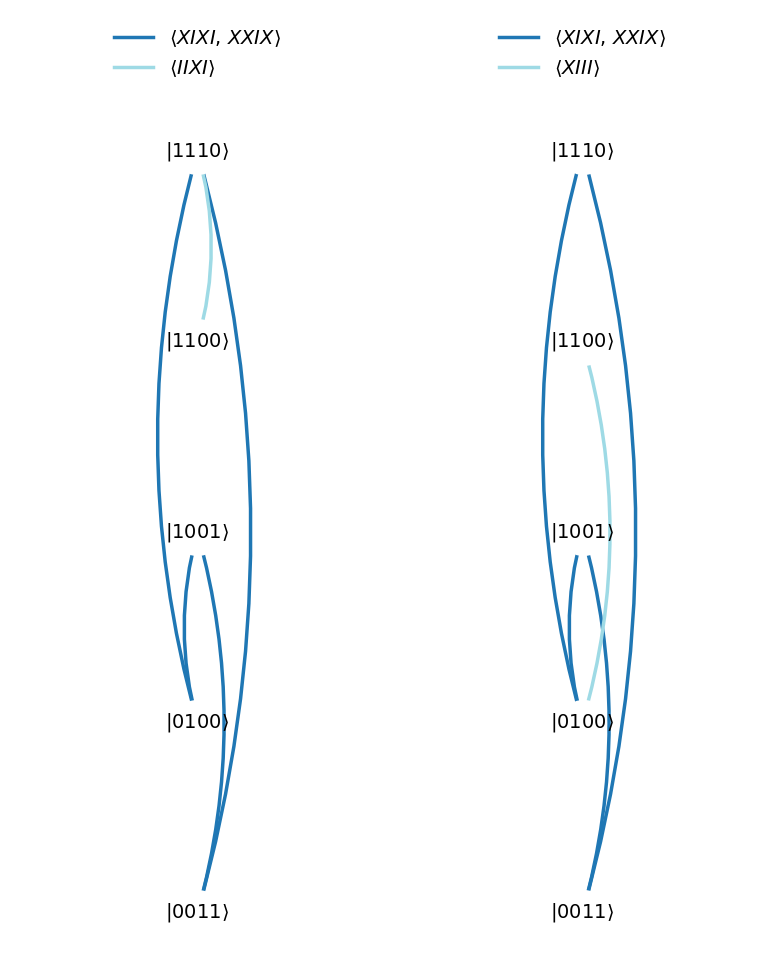

In [17]:
# Draw best mixer(s).
plotter.draw_best_graphs(r=0.15, lw=1.25)
plt.show()

Using the `"semi_restricted_suborbits"` method.